### Google Analytics 4 and BigQuery with Pandas
#### [GA4 Public Dataset](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ga4_obfuscated_sample_ecommerce&t=events_20210131&page=table)


In [11]:
# Uncomment the below lines and run them if you haven't installed the module before
# %pip install google
# %pip install db-dtypes
# %pip install pandas

In [34]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

# Use a service account for authentication onto GCP
credentials = service_account.Credentials.from_service_account_file('secrets/prism-insights-2f5c5a271cc6.json')

# The project id to which the service account has access
project_id = 'prism-insights'

# Establish a connection to the client
client = bigquery.Client(credentials= credentials, project=project_id)

# Perform a query which extracts event information for one date (2021-01-31)
query = client.query(
"""
SELECT
  event_date,
  event_timestamp,
  event_name,
  event_params.value.string_value AS page_url,
  device.*
FROM
  `bigquery-public-data.ga4_obfuscated_sample_ecommerce.events_20210131`,
  UNNEST(event_params) AS event_params --UNNEST allows us to extract the nested records
WHERE
  event_params.key = 'page_location'
""")

#Convert output into a pandas dataframe
df = query.to_dataframe()
df.head() # .head() allows us to view the first x rows

,event_date,event_timestamp,event_name,page_url,category,mobile_brand_name,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,web_info
0,20210131,1612069510766593,page_view,https://shop.googlemerchandisestore.com/,mobile,Apple,iPhone,<Other>,<NA>,Web,<Other>,<NA>,<NA>,en-us,No,<NA>,"{'browser': 'Safari', 'browser_version': '13.1'}"
1,20210131,1612069529243877,scroll,https://shop.googlemerchandisestore.com/,mobile,Apple,iPhone,<Other>,<NA>,Web,<Other>,<NA>,<NA>,en-us,No,<NA>,"{'browser': 'Safari', 'browser_version': '13.1'}"
2,20210131,1612069515781635,page_view,https://shop.googlemerchandisestore.com/,mobile,Apple,iPhone,<Other>,<NA>,Web,<Other>,<NA>,<NA>,en-us,No,<NA>,"{'browser': 'Safari', 'browser_version': '13.1'}"
3,20210131,1612069530073506,user_engagement,https://shop.googlemerchandisestore.com/,mobile,Apple,iPhone,<Other>,<NA>,Web,<Other>,<NA>,<NA>,en-us,No,<NA>,"{'browser': 'Safari', 'browser_version': '13.1'}"
4,20210131,1612069510766593,session_start,https://shop.googlemerchandisestore.com/,mobile,Apple,iPhone,<Other>,<NA>,Web,<Other>,<NA>,<NA>,en-us,No,<NA>,"{'browser': 'Safari', 'browser_version': '13.1'}"


## Quick Analytics Examples
Let's look at some examples of how we can use pandas for a quick overview of our dataset, conducting some basic analysis, or managing categorical values

#### Quick data insights

In [35]:
# Quick insight into the number of rows, columns, missing values (nulls) and data types
# Strings are objects, dates should be converted to datetime (we'll look at this later)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26489 entries, 0 to 26488
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   event_date                26489 non-null  object
 1   event_timestamp           26489 non-null  Int64 
 2   event_name                26489 non-null  object
 3   page_url                  26489 non-null  object
 4   category                  26489 non-null  object
 5   mobile_brand_name         26489 non-null  object
 6   mobile_model_name         26489 non-null  object
 7   mobile_marketing_name     26489 non-null  object
 8   mobile_os_hardware_model  0 non-null      Int64 
 9   operating_system          26489 non-null  object
 10  operating_system_version  26489 non-null  object
 11  vendor_id                 0 non-null      Int64 
 12  advertising_id            0 non-null      Int64 
 13  language                  16548 non-null  object
 14  is_limited_ad_tracking

In [36]:
# Overview of numerical data types with the describe() method
# Notice how the timestamp is treated as an integer and not a date!
df.describe()

,event_timestamp,mobile_os_hardware_model,vendor_id,advertising_id,time_zone_offset_seconds
count,26489.0,0.0,0.0,0.0,0.0
mean,1612095087055260.5,<NA>,<NA>,<NA>,<NA>
std,25258733143.024818,<NA>,<NA>,<NA>,<NA>
min,1612051200657906.0,<NA>,<NA>,<NA>,<NA>
25%,1612073239248363.0,<NA>,<NA>,<NA>,<NA>
50%,1612094855750025.0,<NA>,<NA>,<NA>,<NA>
75%,1612116827810457.0,<NA>,<NA>,<NA>,<NA>
max,1612137595412363.0,<NA>,<NA>,<NA>,<NA>


#### Data cleaning

#### Analysis of categorical variables

In [37]:
# The value_counts() method is a quick way of counting occurences for categorical variables
df.event_name.value_counts()

event_name
page_view              9498
user_engagement        5005
scroll                 2870
session_start          2760
first_visit            2127
view_item              1829
view_promotion         1190
add_to_cart             295
select_item             237
begin_checkout          234
view_search_results     198
add_shipping_info       100
select_promotion         71
add_payment_info         53
purchase                 19
click                     3
Name: count, dtype: int64

#### Plotting

<Axes: xlabel='event_name'>

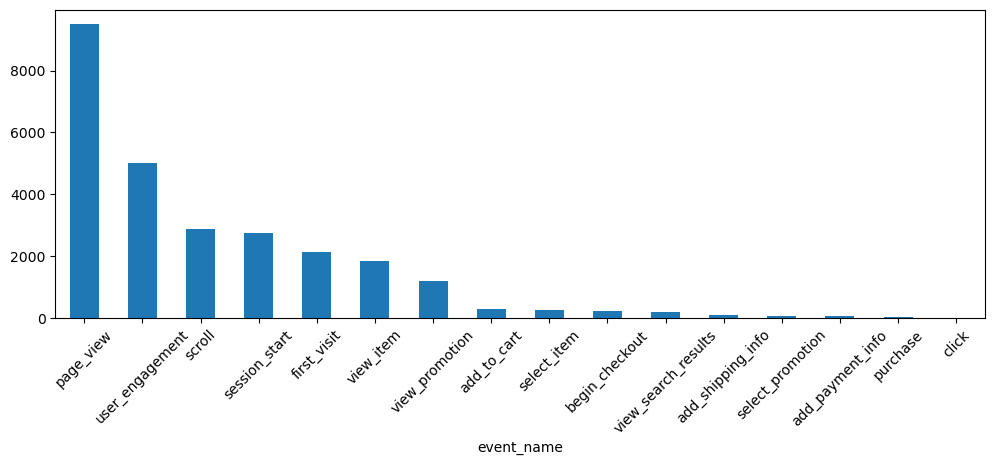

In [39]:
# We can plot the output of the value_counts() method
df.event_name.value_counts().plot(kind='bar', rot=45, figsize=(12,4))

<Axes: xlabel='category'>

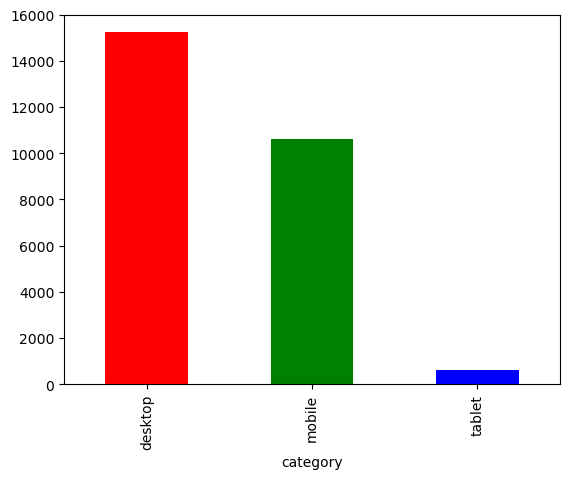

In [75]:
df.category.value_counts().plot(kind='bar', stacked=True, color=['r','g','b'])

#### We can use seaborn for more advanced plotting

In [43]:
#%pip install seaborn

In [49]:
# Let's look at the number of events for each device type using value_counts() and store it
events_by_device = df.category.value_counts()
events_by_device

category
desktop    15239
mobile     10624
tablet       626
Name: count, dtype: int64

/tmp/ipykernel_30468/1662700457.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.event_timestamp)


<Axes: xlabel='event_timestamp', ylabel='Density'>

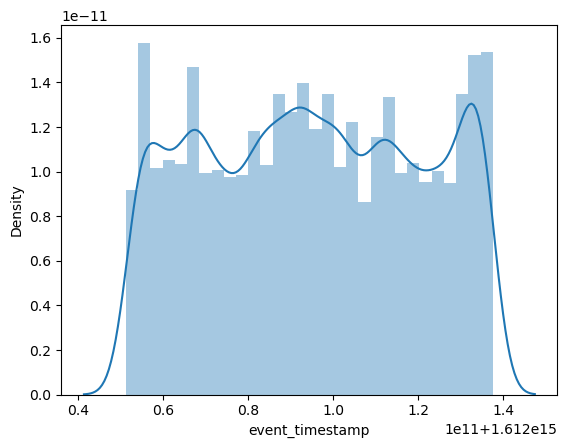

In [78]:
# import the seaborn library and give it the alias: sns
import seaborn as sns

sns.distplot(df.event_timestamp)